In [1]:
import os
import pandas as pd
from rdkit import Chem

DATAPATH = "../data"
SMICOL = "smiles"
INCHICOL = "inchikey"
ACTCOL = "activity"

# Compare Model Training datasets

First, we clean up the original files and add the InChiKey of the smiles if not available. We want to create a dataframe with three columns, smiles, inchikey and activity. We will store each dataset under data/model_datasets/{model_name}_processed.csv

In [2]:
#eos30gr

train_data = pd.read_excel(os.path.join(DATAPATH, "model_datasets", "eos30gr.xlsx"), sheet_name=0)
test_data = pd.read_excel(os.path.join(DATAPATH, "model_datasets", "eos30gr.xlsx"), sheet_name=1)
valid_data = pd.read_excel(os.path.join(DATAPATH, "model_datasets", "eos30gr.xlsx"), sheet_name=2)
eos30gr = pd.concat([train_data, test_data, valid_data])

inchikeys = []
for smi in eos30gr["Smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        inchikey = Chem.MolToInchiKey(mol)
    else:
        inchikey = None
    inchikeys += [inchikey]

eos30gr[INCHICOL] = inchikeys
total_len = len(eos30gr)
eos30gr.dropna(subset=[INCHICOL], inplace=True)
print("Smiles eliminated: ", total_len-len(eos30gr))
eos30gr.rename(columns={"Smiles":SMICOL, "activity10":ACTCOL}, inplace=True) #looking at the model, activity 10 was chosen for activity
eos30gr = eos30gr[[SMICOL, INCHICOL, ACTCOL]]
eos30gr.to_csv(os.path.join(DATAPATH, "model_datasets", "eos30gr_processed.csv"), index=False)


[05:01:21] non-ring atom 10 marked aromatic
[05:01:21] non-ring atom 12 marked aromatic
[05:01:21] non-ring atom 10 marked aromatic
[05:01:21] non-ring atom 14 marked aromatic
[05:01:21] non-ring atom 10 marked aromatic
[05:01:22] non-ring atom 10 marked aromatic
[05:01:22] non-ring atom 10 marked aromatic
[05:01:22] non-ring atom 21 marked aromatic
[05:01:22] non-ring atom 10 marked aromatic
[05:01:22] non-ring atom 10 marked aromatic
[05:01:22] non-ring atom 12 marked aromatic
[05:01:22] non-ring atom 12 marked aromatic
[05:01:23] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:23] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:24] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:24] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:25] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:25] Explicit valence for atom # 0 N, 4, is greater than permitted
[05:01:25] Explicit valence for at

Smiles eliminated:  49


In [15]:
#eos2ta5

train_data = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos2ta5", "train_validation_cardio_tox_data.csv"))
test_data = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos2ta5", 'external_test_set_neg.csv'))
test_data2 = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos2ta5", 'external_test_set_new.csv'))
test_data3 = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos2ta5", 'external_test_set_pos.csv'))

eos2ta5 = pd.concat([train_data, test_data,test_data2, test_data3])

inchikeys = []
for smi in eos2ta5["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        inchikey = Chem.MolToInchiKey(mol)
    else:
        inchikey = None
    inchikeys += [inchikey]

eos2ta5[INCHICOL] = inchikeys
total_len = len(eos2ta5)
eos2ta5.dropna(subset=[INCHICOL], inplace=True)
print("Smiles eliminated: ", total_len-len(eos2ta5))
eos2ta5.rename(columns={"smiles":SMICOL, "ACTIVITY":ACTCOL}, inplace=True) #looking at the model, activity 10 was chosen for activity
eos2ta5 = eos2ta5[[SMICOL, INCHICOL, ACTCOL]]
eos2ta5.to_csv(os.path.join(DATAPATH, "model_datasets", "eos2ta5_processed.csv"), index=False)

/tmp/ipykernel_3160574/3265443799.py:3: DtypeWarning: Columns (118,119,120,124,125,126,130,131,132,136,137,138,142,143,144,148,149,150,154,155,156,160,161,162,166,167,168,172,173,174,268,269,270,274,275,276,280,281,282,286,287,288,292,293,294,298,299,300,304,305,306,310,311,312,316,317,318,322,323,324,327,328,329,332,333,334,337,338,339,342,343,344,347,348,349,352,353,354,357,358,359,362,363,364,367,368,369,372,373,374,377,378,379,382,383,384,387,388,389,392,393,394,397,398,399,402,403,404,407,408,409,412,413,414,417,418,419,422,423,424,480,481,482,483,493,494,495,496,720) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos2ta5", "train_validation_cardio_tox_data.csv"))
/tmp/ipykernel_3160574/3265443799.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once us

Smiles eliminated:  0


In [16]:
#eos4tcc
finetuning_data = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos4tcc", "finetuning_eos4tcc", "test_all.csv"))
finetuning_data2 = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos4tcc", "finetuning_eos4tcc", "test_rev.csv"))
finetuning_data3 = pd.read_csv(os.path.join(DATAPATH, "model_datasets", "eos4tcc", "finetuning_eos4tcc", "training.csv"))
finetuning_data4 = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos4tcc", "finetuning_eos4tcc", "val_all.csv"))
finetuning_data5 = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos4tcc", "finetuning_eos4tcc", "val_rev.csv"))
eos4tcc = pd.concat([finetuning_data, finetuning_data2,finetuning_data3,finetuning_data4,finetuning_data5 ])

inchikeys = []
for smi in eos4tcc["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        inchikey = Chem.MolToInchiKey(mol)
    else:
        inchikey = None
    inchikeys += [inchikey]

eos4tcc[INCHICOL] = inchikeys
total_len = len(eos4tcc)
eos4tcc.dropna(subset=[INCHICOL], inplace=True)
print("Smiles eliminated: ", total_len-len(eos4tcc))
eos4tcc.rename(columns={"smiles":SMICOL, "label":ACTCOL}, inplace=True) 
eos4tcc = eos4tcc[[SMICOL, INCHICOL, ACTCOL]]
eos4tcc.to_csv(os.path.join(DATAPATH, "model_datasets", "eos4tcc_processed.csv"), index=False)


Smiles eliminated:  0


In [17]:
# eos30f3
train_data = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos30f3", "Cai_TableS3_fixed.csv"))

# Concatenating Data
eos30f3 = pd.concat([train_data])

# Generating InChiKeys
inchikeys = []
for smi in eos30f3["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        inchikey = Chem.MolToInchiKey(mol)
    else:
        inchikey = None
    inchikeys += [inchikey]

# Adding InChiKeys to DataFrame and Dropping NaN Values
eos30f3[INCHICOL] = inchikeys
total_len = len(eos30f3)
eos30f3.dropna(subset=[INCHICOL], inplace=True)
print("Smiles eliminated: ", total_len - len(eos30f3))

# Renaming Columns
eos30f3.rename(columns={"smiles": SMICOL, "X10": ACTCOL}, inplace=True)

# Selecting Columns
eos30f3 = eos30f3[[SMICOL, INCHICOL, ACTCOL]]

# Saving Processed Data
eos30f3.to_csv(os.path.join(DATAPATH, "model_datasets", "eos30f3_processed.csv"), index=False)

Smiles eliminated:  0


Once all the datasets have been cleaned, we can compare them

In [4]:
models = ["eos2ta5", "eos4tcc", "eos30f3", "eos30gr"]

# load the datasets and make comparisons
eos2ta5 = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos2ta5_processed.csv"))
eos4tcc = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos4tcc_processed.csv"))
eos30f3 = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos30f3_processed.csv"))
eos30gr = pd.read_csv(os.path.join(DATAPATH, "model_datasets","eos30gr_processed.csv"))

# proportion of actives and inactives in each dataset
print("eos2ta5:")
print(eos2ta5['activity'].value_counts())

print("\neos4tcc:")
print(eos4tcc['activity'].value_counts())

print("\neos30f3:")
print(eos30f3['activity'].value_counts())

print("\neos30gr:")
print(eos30gr['activity'].value_counts())

# number of repeated inchikey between models
# Check repeated inchikey within each dataset
repeated_inchikey_eos2ta5 = eos2ta5['inchikey'].duplicated().sum()
repeated_inchikey_eos4tcc = eos4tcc['inchikey'].duplicated().sum()
repeated_inchikey_eos30f3 = eos30f3['inchikey'].duplicated().sum()
repeated_inchikey_eos30gr = eos30gr['inchikey'].duplicated().sum()

# Print the results
print(f"Number of repeated inchikeys in eos2ta5: {repeated_inchikey_eos2ta5}")
print(f"Number of repeated inchikeys in eos4tcc: {repeated_inchikey_eos4tcc}")
print(f"Number of repeated inchikeys in eos30f3: {repeated_inchikey_eos30f3}")
print(f"Number of repeated inchikeys in eos30gr: {repeated_inchikey_eos30gr}")



# Check repeated inchikey between pairs of datasets
repeated_inchikey_eos2ta5_eos4tcc = pd.concat([eos2ta5['inchikey'], eos4tcc['inchikey']]).duplicated().sum()
repeated_inchikey_eos2ta5_eos30f3 = pd.concat([eos2ta5['inchikey'], eos30f3['inchikey']]).duplicated().sum()
repeated_inchikey_eos2ta5_eos30gr = pd.concat([eos2ta5['inchikey'], eos30gr['inchikey']]).duplicated().sum()
repeated_inchikey_eos4tcc_eos30f3 = pd.concat([eos4tcc['inchikey'], eos30f3['inchikey']]).duplicated().sum()
repeated_inchikey_eos4tcc_eos30gr = pd.concat([eos4tcc['inchikey'], eos30gr['inchikey']]).duplicated().sum()
repeated_inchikey_eos30f3_eos30gr = pd.concat([eos30f3['inchikey'], eos30gr['inchikey']]).duplicated().sum()

# Print the results
print(f"Number of repeated inchikeys between eos2ta5 and eos4tcc: {repeated_inchikey_eos2ta5_eos4tcc}")
print(f"Number of repeated inchikeys between eos2ta5 and eos30f3: {repeated_inchikey_eos2ta5_eos30f3}")
print(f"Number of repeated inchikeys between eos2ta5 and eos30gr: {repeated_inchikey_eos2ta5_eos30gr}")
print(f"Number of repeated inchikeys between eos4tcc and eos30f3: {repeated_inchikey_eos4tcc_eos30f3}")
print(f"Number of repeated inchikeys between eos4tcc and eos30gr: {repeated_inchikey_eos4tcc_eos30gr}")
print(f"Number of repeated inchikeys between eos30f3 and eos30gr: {repeated_inchikey_eos30f3_eos30gr}")

eos2ta5:
activity
0    6727
1    6718
Name: count, dtype: int64

eos4tcc:
activity
1    9284
0    6487
Name: count, dtype: int64

eos30f3:
activity
1    4355
0    3534
Name: count, dtype: int64

eos30gr:
activity
1.0    4332
0.0    3526
Name: count, dtype: int64
Number of repeated inchikeys in eos2ta5: 178
Number of repeated inchikeys in eos4tcc: 1726
Number of repeated inchikeys in eos30f3: 455
Number of repeated inchikeys in eos30gr: 5573
Number of repeated inchikeys between eos2ta5 and eos4tcc: 12780
Number of repeated inchikeys between eos2ta5 and eos30f3: 7702
Number of repeated inchikeys between eos2ta5 and eos30gr: 12797
Number of repeated inchikeys between eos4tcc and eos30f3: 9267
Number of repeated inchikeys between eos4tcc and eos30gr: 14362
Number of repeated inchikeys between eos30f3 and eos30gr: 13433


In [3]:
# Define the dataset paths
datasets = [
    {'path': '../data/model_datasets/eos2ta5_processed.csv'},
    {'path': '../data/model_datasets/eos30f3_processed.csv'},
    {'path': '../data/model_datasets/eos4tcc_processed.csv'},
    {'path': '../data/model_datasets/eos30gr_processed.csv'}
]

# Read datasets into a list of DataFrames
dfs = [pd.read_csv(dataset['path']) for dataset in datasets]

# Dictionary to store the results
overlap_results = {}

# Method 1: Get inchi keys common to ALL the models' datasets
common_keys = set.intersection(*(set(df['inchikey']) for df in dfs))
total_common_molecules = len(common_keys)

for i, df in enumerate(dfs):
    total_molecules = len(df)
    percentage_overlap = (total_common_molecules / total_molecules) * 100
    overlap_results[f"Percentage overlap for {datasets[i]['path']} with all models"] = percentage_overlap

# Method 2: Pairwise percentage overlap
for i in range(len(dfs)):
    for j in range(i + 1, len(dfs)):
        common_keys_pairwise = set.intersection(set(dfs[i]['inchikey']), set(dfs[j]['inchikey']))
        total_molecules_i = len(dfs[i])
        total_molecules_j = len(dfs[j])
        percentage_overlap_pairwise = (len(common_keys_pairwise) / min(total_molecules_i, total_molecules_j)) * 100
        overlap_results[f"Percentage overlap between {datasets[i]['path']} and {datasets[j]['path']}"] = percentage_overlap_pairwise

# Display the results
for key, value in overlap_results.items():
    print(f"{key}: {value:.2f}%")


Percentage overlap for ../data/model_datasets/eos2ta5_processed.csv with all models: 50.98%
Percentage overlap for ../data/model_datasets/eos30f3_processed.csv with all models: 86.88%
Percentage overlap for ../data/model_datasets/eos4tcc_processed.csv with all models: 43.46%
Percentage overlap for ../data/model_datasets/eos30gr_processed.csv with all models: 52.81%
Percentage overlap between ../data/model_datasets/eos2ta5_processed.csv and ../data/model_datasets/eos30f3_processed.csv: 89.61%
Percentage overlap between ../data/model_datasets/eos2ta5_processed.csv and ../data/model_datasets/eos4tcc_processed.csv: 80.89%
Percentage overlap between ../data/model_datasets/eos2ta5_processed.csv and ../data/model_datasets/eos30gr_processed.csv: 54.29%
Percentage overlap between ../data/model_datasets/eos30f3_processed.csv and ../data/model_datasets/eos4tcc_processed.csv: 89.82%
Percentage overlap between ../data/model_datasets/eos30f3_processed.csv and ../data/model_datasets/eos30gr_processed

# Build test dataset

We collate in a single file the data from the NCATS repository and eliminate any duplicate molecules that exist in the training sets of the models already.

In [17]:
df1 = pd.read_csv(os.path.join(DATAPATH, "test_data", "training_set_ncats.csv"))
df2 = pd.read_csv(os.path.join(DATAPATH, "test_data", "validation_set_ncats.csv"))

In [12]:
df1.columns

Index(['smiles', 'activity', 'source'], dtype='object')

In [18]:
#merge and remove duplicates. Obtain InChiKeys for all

df = pd.concat([df1, df2])
inchikeys = []
for smi in df["smiles"]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        inchikey = Chem.MolToInchiKey(mol)
    else:
        inchikey = None
    inchikeys += [inchikey]

df[INCHICOL] = inchikeys
total_len = len(df)
df.dropna(subset=[INCHICOL], inplace=True)
print("Smiles eliminated: ", total_len-len(df))
total_len = len(df)
df.drop_duplicates(subset=[SMICOL], inplace=True)
print("Smiles eliminated: ", total_len-len(df))
df = df[[SMICOL, INCHICOL, ACTCOL]]
df.to_csv(os.path.join(DATAPATH, "test_data", "ncats.csv"), index=False)


Smiles eliminated:  0
Smiles eliminated:  32


In [19]:
# Now, from the all NCATS data, we eliminate duplicated molecules with training set
## concatenate the training set together
training_set = pd.concat([eos2ta5, eos4tcc, eos30f3, eos30gr], ignore_index=True)

# Save the training set to a CSV file
training_set.to_csv(os.path.join(DATAPATH, "model_datasets","training_set.csv"), index=False)

##Load the test dataset
test_dataset= pd.read_csv(os.path.join(DATAPATH, "test_data", "test_dataset.csv")) 

# Calculate the number of removed InChiKey
initial_inchikey_count = len(test_dataset)
processed_test_dataset = test_dataset[~test_dataset['InChiKey'].isin(training_set['inchikey'])]
removed_inchikey_count = initial_inchikey_count - len(processed_test_dataset)

# Print the number of removed smiles
print(f"Number of removed inchikey: {removed_inchikey_count}")

# Save the processed test dataset to a file
processed_test_dataset.to_csv(os.path.join(DATAPATH, "test_data", "processed_test_dataset.csv"), index=False)

Number of removed inchikey: 0


In [21]:
## Confirm that the training and test dataset has no Inchikey in common

training_set = pd.read_csv(os.path.join(DATAPATH,"model_datasets", "training_set.csv"))
test_set = pd.read_csv(os.path.join(DATAPATH,"test_data", "processed_test_dataset.csv"))

# Check for common inchikeys
common_inchikey = set(training_set['inchikey']).intersection(set(test_set['InChiKey']))

# Print the number of common Inchikey
print(f"Number of common inchikeys between training and test datasets: {len(common_inchikey)}")

print("Common inchikey:", common_inchikey)

Number of common inchikeys between training and test datasets: 0
Common inchikey: set()


In [8]:
## Using dimensionality reduction and PCA analysis to compare training and test dataset.
import os
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the training and test dataset
training_set = pd.read_csv(os.path.join(DATAPATH,"model_datasets", "training_set.csv"))
test_set = pd.read_csv(os.path.join(DATAPATH,"test_data", "processed_test_dataset.csv"))

In [9]:
## Generate Margan fingerprints using RDkit
# Generate fingerprints using RDKit
# Generate fingerprints using RDKit
def generate_fingerprints(smiles_list):
    mol_list = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]
    fingerprints = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mol_list]
    # Convert bit vector to numpy array
    fingerprints_np = np.array([list(fp.ToBitString()) for fp in fingerprints], dtype=int)
    return fingerprints_np
# Generate fingerprints for training and test sets
train_fingerprints = generate_fingerprints(training_set['smiles'])
test_fingerprints = generate_fingerprints(test_set['smiles'])



In [10]:
# Combine data
all_fingerprints = np.vstack([train_fingerprints, test_fingerprints])

# Standardize data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_fingerprints)

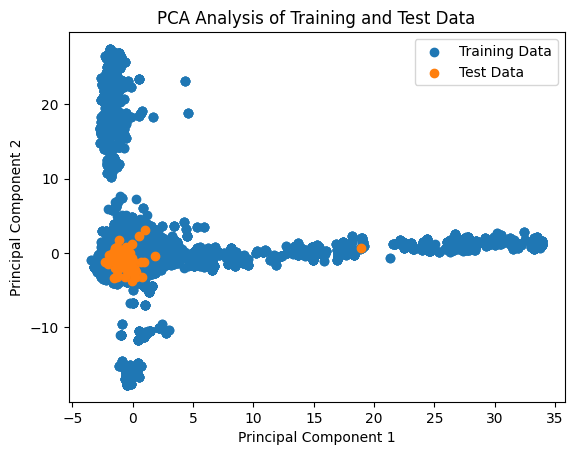

In [11]:
# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_data)

# Split back into training and test PCA results
train_pca_result = pca_result[:len(training_set)]
test_pca_result = pca_result[len(training_set):]

# Plot PCA results
plt.scatter(train_pca_result[:, 0], train_pca_result[:, 1], label='Training Data')
plt.scatter(test_pca_result[:, 0], test_pca_result[:, 1], label='Test Data')
plt.legend()
plt.title('PCA Analysis of Training and Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()